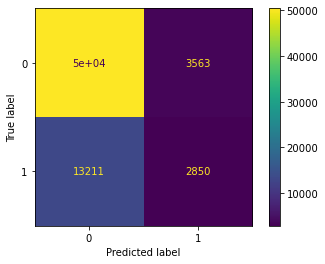

In [62]:
#logisic regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



app = pd.read_csv('data_sets/applicants.csv')
ins = app["account_id"].dtype

feature_cols = ['is_family_friendly', 'session_count','level','risk']
X = app[feature_cols] # Features
y = app.response # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)



#modelling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()

plt.show()

In [63]:
from sklearn.metrics import classification_report
target_names = ['Eligible', 'Rejected']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Eligible       0.79      0.93      0.86     53993
    Rejected       0.44      0.18      0.25     16061

    accuracy                           0.76     70054
   macro avg       0.62      0.56      0.56     70054
weighted avg       0.71      0.76      0.72     70054



In [64]:
x_new = pd.DataFrame(
    {'is_family_friendly': [1],
        'session_count': [400], 'level': [40], 'risk': [2.3]}
)

new_pred = logreg.predict(x_new)
new_pred_labels = np.argmax(new_pred, axis=0)

import numpy as np

# Define a dictionary that maps numbers to words
num_to_word = {
    0: "eligible",
    1: "rejected"
    
}

if new_pred_labels in num_to_word:
    print(num_to_word[new_pred_labels])


eligible
